In [1]:
# compare raw Zbedrock and low Zbedrock 
# 400 samples from LHS

In [35]:
import pandas as pd
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt

target basins 53


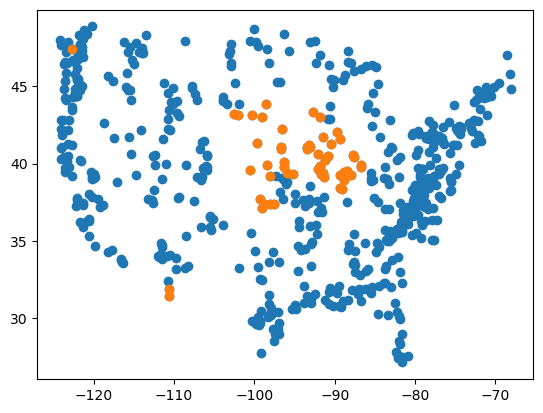

In [36]:
# find basins to change
files = glob.glob('/glade/work/guoqiang/CTSM_CAMELS/data_paramcailb/ParamCalib_basinparam_*.csv')

z = []
for f in files:
    df=pd.read_csv(f)
    if 'zbedrock' in df['Parameter'].values:
        d = df[df['Parameter']=='zbedrock']['Default'].values[0]
        z.append(d)
    else:
        z.append(-999)

z = np.array(z)

index = np.where(z>5)[0]
print('target basins', len(index))
sel_hruid = [int(files[s].split('basinparam_')[1].split('.csv')[0]) for s in index]

# basin info
file = '/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv'
df_info = pd.read_csv(file)

sel_id = [np.where(df_info['hru_id'].values == h)[0][0] for h in sel_hruid]
sel_id = np.sort(np.array(sel_id))

# plot locations
lat = df_info['lat_cen'].values
lon = df_info['lon_cen'].values
plt.scatter(lon, lat)
plt.scatter(lon[sel_id], lat[sel_id])
plt.show()

# load metrics

In [37]:
flag = 0
dfall = []
for b in sel_id:
    file1 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs/iter0_many_metric.csv'
    file2 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs_LowZbedrock/iter0_many_metric.csv'
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    df1['basin'] = b
    df1['order'] = flag
    df1['iter'] = np.arange(400)
    df1['Zbedrock'] = 'raw'
    df2['basin'] = b
    df2['order'] = flag
    df2['iter'] = np.arange(400)
    df2['Zbedrock'] = 'low'
    dfall.append(pd.concat([df1, df2]))
    flag = flag + 1

dfall = pd.concat(dfall)

# compare metrics

In [38]:
# statistics of all 400 samples
for z in ['raw', 'low']:
    for met in ['kge', 'mae', 'max_mon_abs_err']:
        dzm = dfall[ (dfall['Zbedrock']==z) ][met].values
        print(z, met, 'mean/median', f'{np.nanmean(dzm):.2f}', f'{np.nanmedian(dzm):.2f}')

raw kge mean/median -2.00 -0.21
raw mae mean/median 10.72 6.10
raw max_mon_abs_err mean/median 24.32 11.99
low kge mean/median -1.94 -0.04
low mae mean/median 9.24 5.49
low max_mon_abs_err mean/median 18.40 9.40


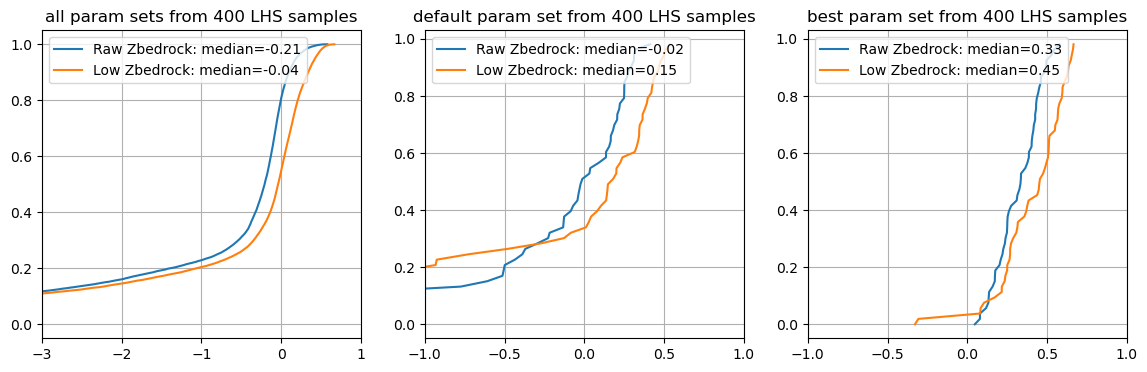

In [44]:


fig = plt.figure(figsize=[14, 4])

# All metrics from 400 samples
fig.add_subplot(1,3,1)
d = dfall[ (dfall['Zbedrock']=='raw') ]['kge'].values
m = np.nanmedian(d)
plt.plot(np.sort(d), np.arange(len(d))/len(d), label=f'Raw Zbedrock: median={m:.2f}')

d = dfall[ (dfall['Zbedrock']=='low') ]['kge'].values
m = np.nanmedian(d)
plt.plot(np.sort(d), np.arange(len(d))/len(d), label=f'Low Zbedrock: median={m:.2f}')

plt.legend(loc='upper left')
plt.grid('on')
plt.xlim(-3, 1)
plt.title('all param sets from 400 LHS samples')

# Default metric from the 400 samples
fig.add_subplot(1,3,2)

d = []
for i in sel_id:
    d.append( dfall[ (dfall['Zbedrock']=='raw') & (dfall['basin']==i) ]['kge'].values[0] )
m = np.nanmedian(d)
plt.plot(np.sort(d), np.arange(len(d))/len(d), label=f'Raw Zbedrock: median={m:.2f}')

d = []
for i in sel_id:
    d.append( dfall[ (dfall['Zbedrock']=='low') & (dfall['basin']==i) ]['kge'].values[0] )
m = np.nanmedian(d)
plt.plot(np.sort(d), np.arange(len(d))/len(d), label=f'Low Zbedrock: median={m:.2f}')

plt.legend(loc='upper left')
plt.grid('on')
plt.xlim(-1, 1)
plt.title('default param set from 400 LHS samples')



# Best metric from the 400 samples
fig.add_subplot(1,3,3)

d = []
for i in sel_id:
    d.append( np.nanmax(dfall[ (dfall['Zbedrock']=='raw') & (dfall['basin']==i) ]['kge'].values))
m = np.nanmedian(d)
plt.plot(np.sort(d), np.arange(len(d))/len(d), label=f'Raw Zbedrock: median={m:.2f}')

d = []
for i in sel_id:
    d.append( np.nanmax(dfall[ (dfall['Zbedrock']=='low') & (dfall['basin']==i) ]['kge'].values))
m = np.nanmedian(d)
plt.plot(np.sort(d), np.arange(len(d))/len(d), label=f'Low Zbedrock: median={m:.2f}')

plt.legend(loc='upper left')
plt.grid('on')
plt.xlim(-1, 1)
plt.title('best param set from 400 LHS samples')

plt.show()